# Importing Libraries

In [1]:
import numpy as np
from math import sqrt
import scipy.io
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Reading 'Mat' File

In [2]:
H3Data_dict = scipy.io.loadmat('H3Data.mat')

In [3]:
datamat = H3Data_dict['Datamat']
querymat = H3Data_dict['Querymat']

In [4]:
print(datamat)
print(querymat)

[[ 9.12254681 16.21622775  3.        ]
 [ 1.5843831  34.23444002  1.        ]
 [36.2468154  22.15467555  2.        ]
 [ 7.2079405  21.78315399  2.        ]
 [31.79634083 39.65117578  3.        ]
 [39.49237793 40.77781848  1.        ]
 [28.31265633 37.60563269  1.        ]
 [18.87069619 39.46279707  1.        ]
 [41.07930578 25.06337265  3.        ]
 [15.24404148 27.75909613  3.        ]
 [15.96865488 31.53748692  2.        ]
 [39.24899457  4.89945824  3.        ]
 [25.18682185 12.2838091   1.        ]
 [13.0498366  30.78625711  1.        ]
 [36.62377621 15.24799788  2.        ]
 [ 8.14749825 38.34838014  2.        ]
 [46.05376111 13.36145462  2.        ]
 [11.11117313  1.97531521  2.        ]
 [ 4.18043587 14.82808888  1.        ]
 [ 3.68507769 27.81824875  1.        ]
 [38.47758288 48.45372355  1.        ]
 [40.88385133 34.45623556  1.        ]
 [37.02127676 35.89406992  3.        ]
 [37.91243936 27.95145598  2.        ]
 [48.05974901 26.66771039  1.        ]
 [23.3212481  43.78620013

# Data Visualization

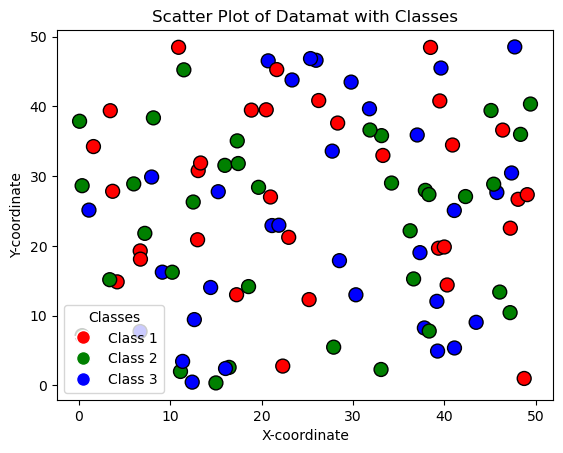

In [5]:
cmap = ListedColormap(['red', 'green', 'blue'])

plt.scatter(datamat[:, 0], datamat[:, 1], c=datamat[:, 2], cmap=cmap, s=100, edgecolor='k')
plt.title('Scatter Plot of Datamat with Classes')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')

classes = np.unique(datamat[:, 2])
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(int(i)-1), markersize=10) for i in classes]
plt.legend(handles, [f'Class {int(i)}' for i in classes], title="Classes")
plt.show()

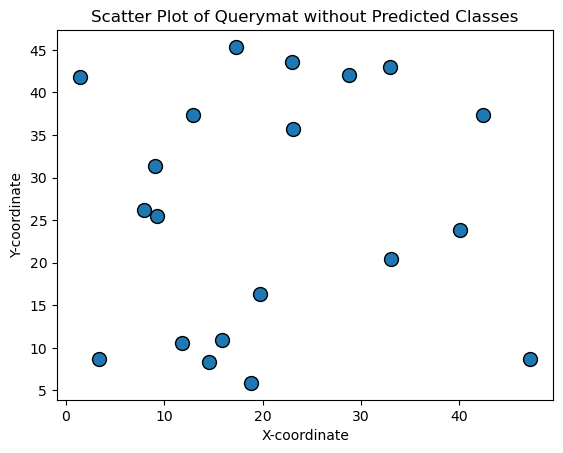

In [6]:
plt.scatter(querymat[:, 0], querymat[:, 1], s=100, edgecolor='k')
plt.title('Scatter Plot of Querymat without Predicted Classes')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.show()

# Calculate the Euclidean distance between two vectors

In [7]:
def euclidean_distance(querymat_row, datamat_row):
    distance = 0.0
    for i in range(len(querymat_row)-1):
        distance += (querymat_row[i] - datamat_row[i])**2
    return sqrt(distance)

# KNN Function

In [8]:
def knn(datamat, querymat, num_neighbors):
    _predictions = list()
    for each_querymat_row in querymat:
        distances = list()
        neighbors = list()
        for each_datamat_row in datamat:
            dist = euclidean_distance(each_querymat_row, each_datamat_row)
            distances.append((each_datamat_row, dist))
        distances.sort(key=lambda tup: tup[1])
        for i in range(num_neighbors):
            neighbors.append(distances[i][0])
        output_values = [row[-1] for row in neighbors]
        _predictions.append(max(set(output_values), key=output_values.count))
    return _predictions

In [9]:
predictions = knn(datamat, querymat, 3)
print(predictions)

[2.0, 1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 3.0, 1.0, 2.0, 3.0, 1.0, 2.0, 2.0, 1.0, 3.0, 1.0, 2.0, 2.0, 1.0]


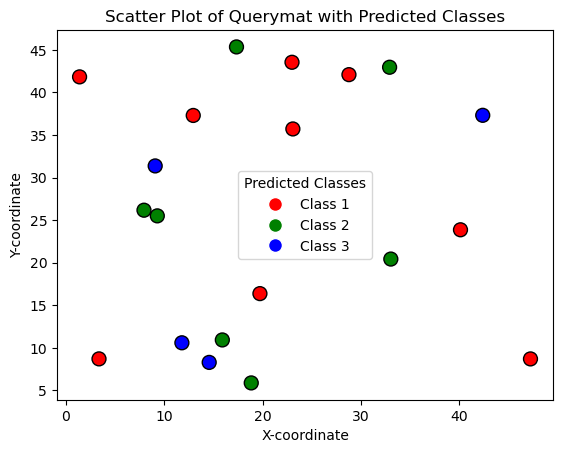

In [10]:
cmap = ListedColormap(['red', 'green', 'blue'])

plt.scatter(querymat[:, 0], querymat[:, 1], c=predictions, cmap=cmap, s=100, edgecolor='k')
plt.title('Scatter Plot of Querymat with Predicted Classes')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')

classes = np.unique(predictions)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(int(i)-1), markersize=10) for i in classes]
plt.legend(handles, [f'Class {int(i)}' for i in classes], title="Predicted Classes")
plt.show()

# Reference:
https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/